## 신경망, 딥러닝의 응용

### MNIST 데이터베이스
: 60,000개의 train data, 10,000개의 test data

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) =mnist.load_data()

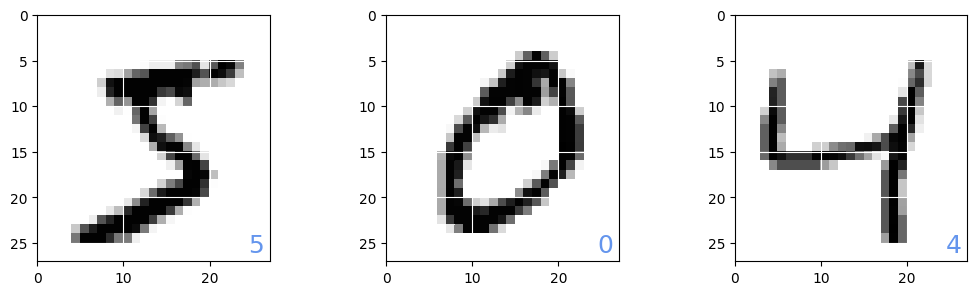

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id], color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

### Keras를 이용한 2층 피드 포워드 네트워크 모델

In [ ]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(60000, 784) # (A)
x_train = x_train.astype('float32') # (B)
x_train = x_train / 255 # (C)
num_classes = 10
y_train = to_categorical(y_train, num_classes) # (D)


x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = to_categorical(y_test, num_classes)

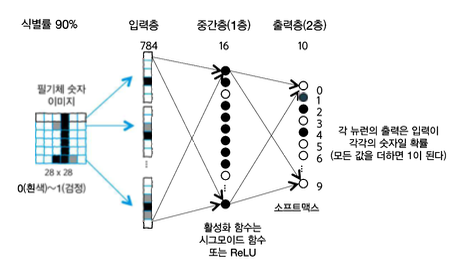

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy',
optimizer=Adam(), metrics=['accuracy']) # (D)

In [ ]:
import time


startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, verbose=1, validation_data=(x_test, y_test)) # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 10ms/step - loss: 2.0822 - accuracy: 0.3701 - val_loss: 1.8142 - val_accuracy: 0.5700
Epoch 2/10
60/60 [==============================] - 0s 7ms/step - loss: 1.6473 - accuracy: 0.6526 - val_loss: 1.4741 - val_accuracy: 0.7550
Epoch 3/10
60/60 [==============================] - 0s 8ms/step - loss: 1.3534 - accuracy: 0.7799 - val_loss: 1.2162 - val_accuracy: 0.8208
Epoch 4/10
60/60 [==============================] - 0s 7ms/step - loss: 1.1252 - accuracy: 0.8248 - val_loss: 1.0144 - val_accuracy: 0.8496
Epoch 5/10
60/60 [==============================] - 0s 7ms/step - loss: 0.9496 - accuracy: 0.8505 - val_loss: 0.8627 - val_accuracy: 0.8662
Epoch 6/10
60/60 [==============================] - 0s 7ms/step - loss: 0.8175 - accuracy: 0.8649 - val_loss: 0.7489 - val_accuracy: 0.8753
Epoch 7/10
60/60 [==============================] - 0s 7ms/step - loss: 0.7175 - accuracy: 0.8747 - val_loss: 0.6619 - val_accuracy: 0.8847
Epoch 8/10
60/60 [=

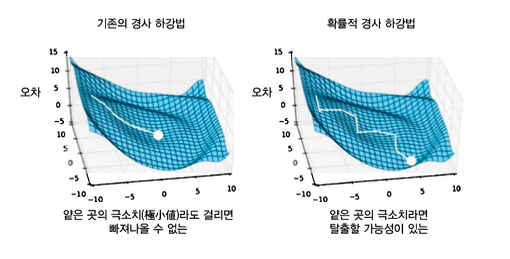

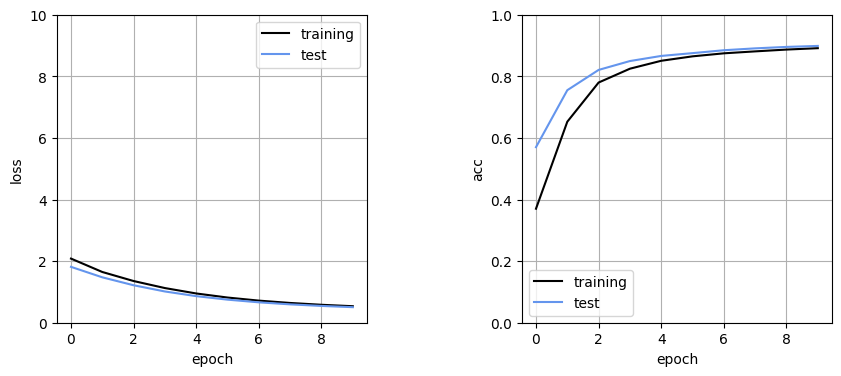

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test',
         color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 2s 3ms/step


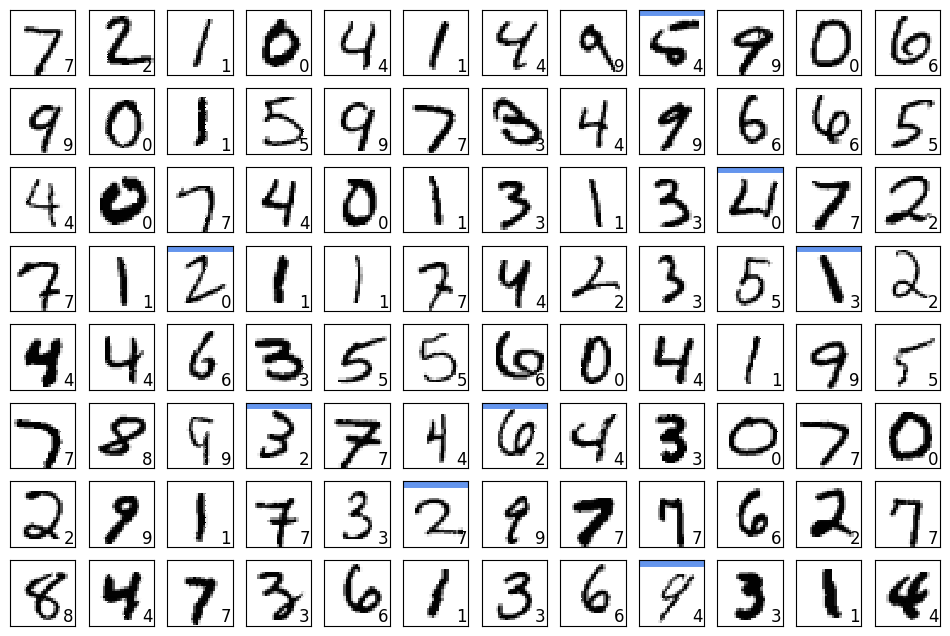

In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- 메인
show_prediction()
plt.show()

### Activation Function


In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 1s 13ms/step - loss: 1.4520 - accuracy: 0.6035 - val_loss: 0.7686 - val_accuracy: 0.8267
Epoch 2/10
60/60 [==============================] - 1s 10ms/step - loss: 0.5942 - accuracy: 0.8551 - val_loss: 0.4606 - val_accuracy: 0.8830
Epoch 3/10
60/60 [==============================] - 1s 22ms/step - loss: 0.4273 - accuracy: 0.8871 - val_loss: 0.3743 - val_accuracy: 0.9007
Epoch 4/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3629 - accuracy: 0.9009 - val_loss: 0.3311 - val_accuracy: 0.9110
Epoch 5/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3268 - accuracy: 0.9103 - val_loss: 0.3057 - val_accuracy: 0.9163
Epoch 6/10
60/60 [==============================] - 1s 10ms/step - loss: 0.3029 - accuracy: 0.9161 - val_loss: 0.2867 - val_accuracy: 0.9207
Epoch 7/10
60/60 [==============================] - 1s 10ms/step - loss: 0.2855 - accuracy: 0.9207 - val_loss: 0.2732 - val_accuracy: 0.9240
Epoch 8/10
60

313/313 [==============================] - 1s 4ms/step


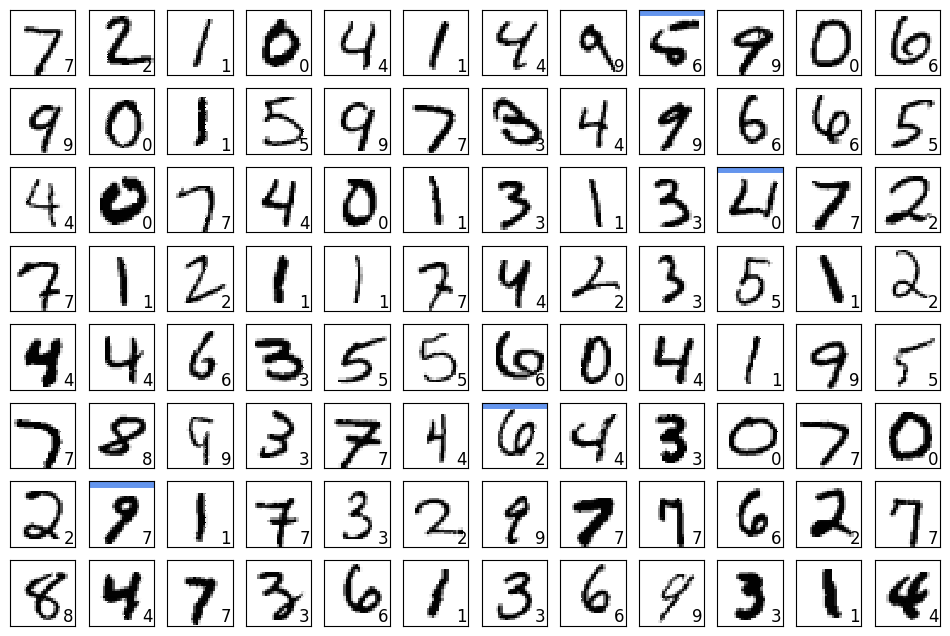

In [ ]:
show_prediction()
plt.show()

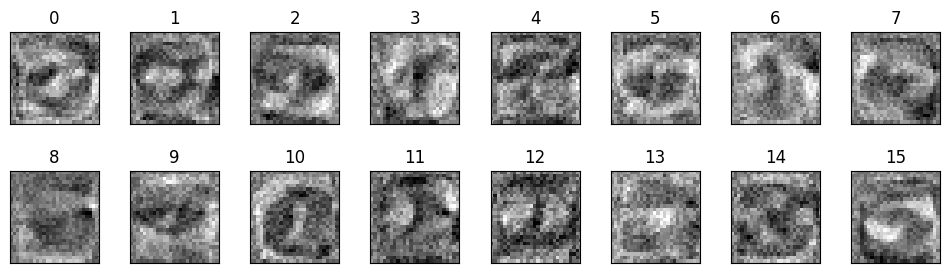

In [ ]:
w = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### 공간 필터

공간 필터를 활용하여 28 x 28의 이미지 모양 그대로 유지한 채로 학습이 가능하다
-> CNN



In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

흰색: 0, 검정색: 1의 값을 가지게 된다.

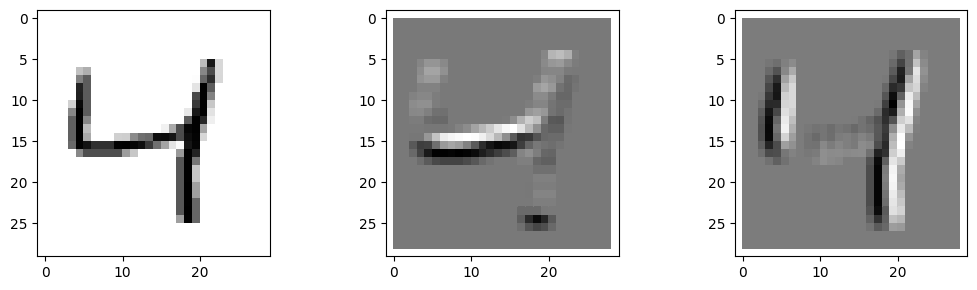

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


id_img = 2
myfil1 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [-2, -2, -2]], dtype=float) # (A)
myfil2 = np.array([[-2, 1, 1],
                   [-2, 1, 1],
                   [-2, 1, 1]], dtype=float) # (B)


x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# 필터 처리
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil1.reshape(-1))
        out_img2[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), myfil2.reshape(-1))


# - 표시
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

### CNN

필터를 신경망에 적용시켜서 학습시키기!

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # CNN을 사용
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu')) # (3, 3)의 필터를 8개 사용
model.add(Flatten()) # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 14s 227ms/step - loss: 0.8220 - accuracy: 0.8045 - val_loss: 0.3435 - val_accuracy: 0.9048
Epoch 2/20
60/60 [==============================] - 12s 198ms/step - loss: 0.3120 - accuracy: 0.9113 - val_loss: 0.2679 - val_accuracy: 0.9232
Epoch 3/20
60/60 [==============================] - 12s 202ms/step - loss: 0.2593 - accuracy: 0.9265 - val_loss: 0.2340 - val_accuracy: 0.9343
Epoch 4/20
60/60 [==============================] - 11s 184ms/step - loss: 0.2256 - accuracy: 0.9363 - val_loss: 0.2085 - val_accuracy: 0.9427
Epoch 5/20
60/60 [==============================] - 9s 156ms/step - loss: 0.1989 - accuracy: 0.9443 - val_loss: 0.1864 - val_accuracy: 0.9486
Epoch 6/20
60/60 [==============================] - 12s 198ms/step - loss: 0.1748 - accuracy: 0.9517 - val_loss: 0.1635 - val_accuracy: 0.9548
Epoch 7/20
60/60 [==============================] - 12s 203ms/step - loss: 0.1560 - accuracy: 0.9571 - val_loss: 0.1503 - val_accuracy: 0.9593


In [ ]:
def show_prediction():
    n_show = 96
    y = model.predict(x_test) # (A)
    plt.figure(2, figsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

313/313 [==============================] - 3s 8ms/step


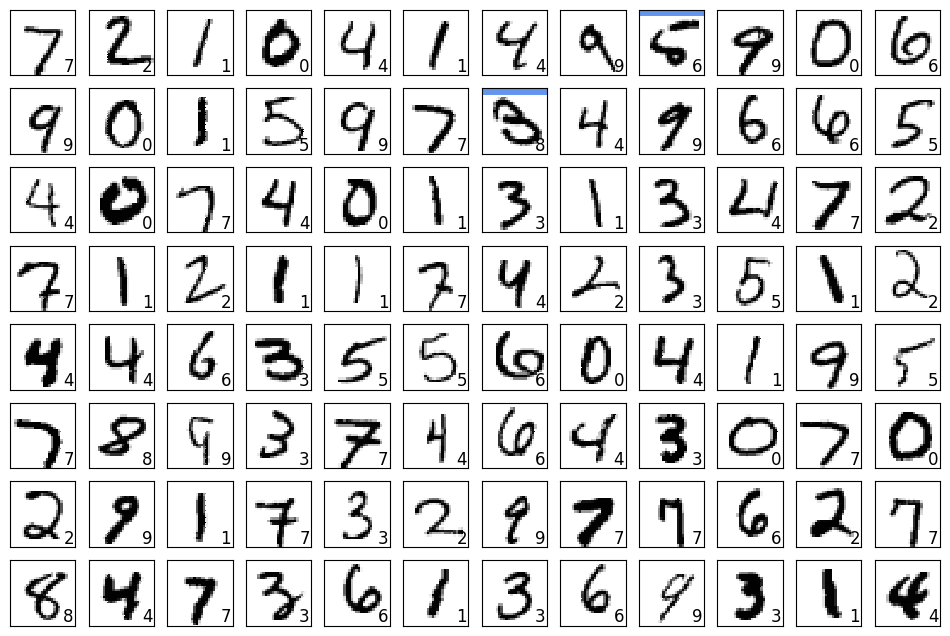

In [ ]:
show_prediction()
plt.show()

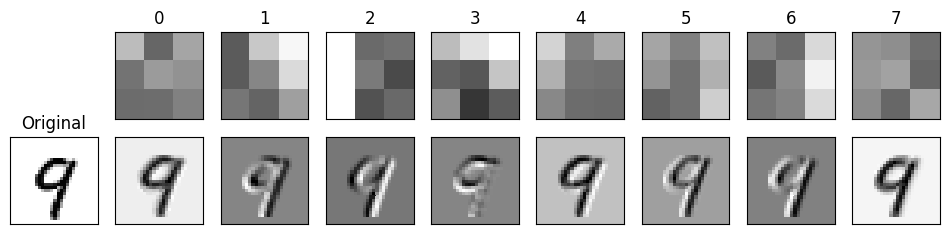

In [ ]:
plt.figure(1, figsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")
plt.title("Original")


w = model.layers[0].get_weights()[0] # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # 필터 처리
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

CNN에 pooling과 dropout을 적용하여 계층의 수를 늘리고 최종적으로 네트워크를 구축한다.

In [ ]:
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import time


model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # (B)
model.add(Dropout(0.25)) # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25)) # (D)
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


startTime = time.time()


history = model.fit(x_train, y_train, batch_size=1000, epochs=20, verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/20
60/60 [==============================] - 89s 1s/step - loss: 0.7044 - accuracy: 0.7943 - val_loss: 0.1305 - val_accuracy: 0.9606
Epoch 2/20
60/60 [==============================] - 85s 1s/step - loss: 0.1390 - accuracy: 0.9585 - val_loss: 0.0677 - val_accuracy: 0.9784
Epoch 3/20
60/60 [==============================] - 83s 1s/step - loss: 0.0906 - accuracy: 0.9723 - val_loss: 0.0480 - val_accuracy: 0.9836
Epoch 4/20
60/60 [==============================] - 85s 1s/step - loss: 0.0717 - accuracy: 0.9774 - val_loss: 0.0394 - val_accuracy: 0.9868
Epoch 5/20
60/60 [==============================] - 83s 1s/step - loss: 0.0591 - accuracy: 0.9824 - val_loss: 0.0349 - val_accuracy: 0.9877
Epoch 6/20
60/60 [==============================] - 83s 1s/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.0291 - val_accuracy: 0.9900
Epoch 7/20
60/60 [==============================] - 82s 1s/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0281 - val_accuracy: 0.9909
Epoch 8/20
60/60 [==

313/313 [==============================] - 4s 12ms/step


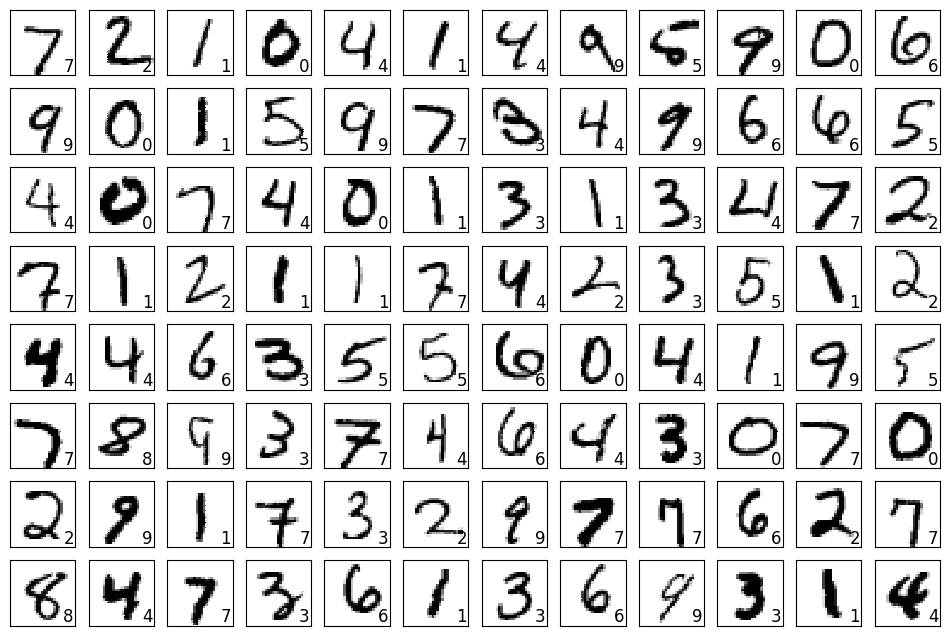

In [ ]:
show_prediction()
plt.show()

### After

피드 포워드 네트워크는 fully connected neural network이다.

  위치 정보에 대한 값은 없으며, 위치가 무작위로 섞여도 성능에는 변화가 없다.

  위치 정보값을 추가적으로 고려하면 acc가 오를 가능성이 있다. -> 위치 정보값을 추가적으로 고려하는 것은 공간 또는 시간에 대한 정보를 모델의 입력으로 제공하는것.

  즉, 위치정보를 고려하면 모델이 데이터의 공간적 특성을 더 잘 이해할 수 있으므로 정확도가 올라갈 것!




dropout에서 mini-batch를 이용한 학습시 batch마다 삭제할 뉴런을 확률적으로 임의로 정하게 된다.

dropout은 앙상블 효과를 나타냄! -> 모델을 여러개 쌓는 것과 같게 볼 수 있으니깐